词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。
使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

# 课堂示例代码复刻

## 中文广告数据

### 数据导入和处理

In [7]:
# 导入并查看数据
import pandas as pd
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [8]:
#stopwords = open('stopwords.txt', encoding = 'utf-8').read()

### jieba分词

In [9]:
import jieba # 中文分词
def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
test = df['广告文本'][0]
clean_text(test)

'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [11]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


### 词向量模型

In [13]:
#训练词语嵌入模型
from gensim.models import Word2Vec
corpus = df['广告文本分词'].apply(lambda x : x.split()).tolist() #切分词语
model = Word2Vec(corpus,  #训练语料
                window = 5,  #训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
                vector_size = 300,  #自定义训练向量维度
                min_count = 1,  #忽略所有总频数低于这个值的词语
                epochs = 5)   
#保存训练好的模型
model.save('word2vec_ad.model')

In [14]:
word_list = model.wv.index_to_key #获取词汇表
word_vectors = model.wv[word_list]  #获取词向量

In [15]:
#打印词汇表和对印的词向量
for word, vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

之:[-0.00335786  0.44589394  0.04765511  0.2861408  -0.0410372  -0.4437257
  0.19001311  0.97530925  0.10642408 -0.144553    0.0746998  -0.4339295
  0.01108532  0.1068124  -0.42413983 -0.28928566  0.23909563 -0.12178954
  0.09698873 -0.3206591  -0.20707935 -0.07523134  0.2612274   0.0804828
  0.47473016  0.02527142 -0.55693775 -0.05119631 -0.3696035  -0.540356
  0.06206322 -0.08739461  0.02253046 -0.21860522 -0.11152203  0.14146681
 -0.04747628 -0.4660499   0.05854574 -0.08381978 -0.17399405  0.05405203
 -0.19828211 -0.43605053  0.1418248   0.27518788  0.18222071  0.22341374
 -0.23848712  0.40458128 -0.01588144 -0.04696273 -0.295103    0.1567682
 -0.07270785  0.414687    0.07114293 -0.05958516  0.03614468  0.01776765
 -0.17681164 -0.15252602 -0.01467391  0.01547875  0.04129894  0.18688424
  0.1792038   0.06052749 -0.27634642 -0.06791787  0.04880041  0.3390961
  0.36282092 -0.5019027   0.08674341  0.24949528 -0.2745576  -0.18544503
 -0.06922768  0.3192976  -0.02425201 -0.5241732   0.0037

In [16]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.9131755
0.8965177
0.8979237
0.99433064
0.99823415
0.9944878


### 可视化

In [18]:
# 降维
words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置
# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

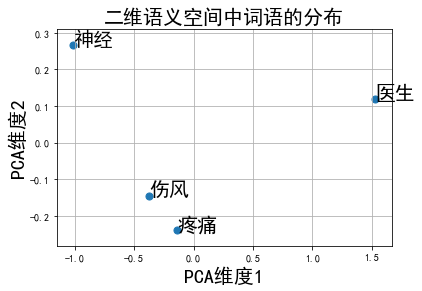

In [19]:
import matplotlib.pyplot as plt #画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

### 寻找最佳模型

In [20]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78743.8203125
Loss after epoch 1: 78510.9609375
Loss after epoch 2: 73442.4375
Loss after epoch 3: 62261.1875
Loss after epoch 4: 48920.09375
Loss after epoch 5: 51991.125
Loss after epoch 6: 43237.03125
Loss after epoch 7: 42418.25
Loss after epoch 8: 46684.53125
Loss after epoch 9: 44862.625
Loss after epoch 10: 43503.4375
Loss after epoch 11: 42093.625
Loss after epoch 12: 40911.8125
Loss after epoch 13: 39567.8125
Loss after epoch 14: 38590.875
Loss after epoch 15: 37416.3125
Loss after epoch 16: 35778.875
Loss after epoch 17: 31698.3125
Loss after epoch 18: 29693.6875
Loss after epoch 19: 29125.9375
Loss after epoch 20: 29331.5625
Loss after epoch 21: 31933.5
Loss after epoch 22: 28039.375
Loss after epoch 23: 27277.5625
Loss after epoch 24: 26537.375
Loss after epoch 25: 27996.875
Loss after epoch 26: 28134.25
Loss after epoch 27: 23949.375
Loss after epoch 28: 26596.375
Loss after epoch 29: 24007.125
Loss after epoch 30: 25393.25
Loss after epoch 31: 25800.25

# 所收集的数据

### 数据导入和处理

In [35]:
import pandas as pd # 数据表
df = pd.read_csv('豆瓣热辣滚烫影评.csv', index_col = 0)
df

,推荐等级,影评题目,评论概要,点赞数,反对数,回应数,影评时间
用户昵称,,,,,,,
Joe,力荐,为什么我们需要导演贾玲,\n电影里有胖女生，但没有洋相百出的肥婆。 电影里有小三和婚内出轨的女性，但没有荡妇羞辱和过...,8569.0,374.0,1445,2024-02-10 13:43:38
刺刺一枚,力荐,任何在对抗项目上寄托过意义的人都会明白的,\n缠好拳击绑带去看的，绑带最后用来抹眼泪了。 这个故事有诸多为了完成度而简化处理或者不够完...,2516.0,130.0,229,2024-02-10 23:44:25
陈折折,力荐,她不是变瘦了，而是变强了。,\n在电影的最后她依旧用着轻轻软软的嗓音说话，但再也没有人敢不把她当回事了。 要说热辣滚烫这...,3200.0,100.0,260,2024-02-11 08:17:44
Bagel_J,力荐,热辣滚烫不是照搬百元之恋,\n75/100 电影本身是三星的水平，因为两件事增加两颗星。 1. 把太郎的角色改成了竹子...,1859.0,101.0,253,2024-02-10 23:16:04
jerry,较差,贾玲演的这个角色充分体现了有钱阶层对普通人不切实际的意淫,不讨论别的，就讨论贾玲老师演的杜乐莹这个角色在现实中存在的可能性。 拿我自己举例子，我月薪1...,2046.0,379.0,1081,2024-02-10 23:19:17
...,...,...,...,...,...,...,...
月球上的天空,力荐,生活现实➕励志➕喜剧,对于看过《百元之恋》的我来说，已经超越《百元》，日式刻意做作的丧让剧情很平淡枯燥，最后的价值...,1.0,1.0,0,2024-02-11 17:38:54
最爱白切黑金毛,力荐,爱自己才是终身浪漫的开始,\n看完了热辣滚烫，内心久久不能平静，它绝对不是什么减肥纪录片，而是一次向内的自我探寻。当电...,NaN,1.0,0,2024-02-11 17:37:56
饿龙咆哮 呜汪~,力荐,热烈滚烫 热泪盈眶,说实话看这部电影之前我并没有很高的期待，因为我以为这是一部减肥题材的励志电影，而这类影片往往...,NaN,1.0,0,2024-02-11 17:36:26


In [36]:
text = list(df['评论概要'].dropna())
text

['\n电影里有胖女生，但没有洋相百出的肥婆。 电影里有小三和婚内出轨的女性，但没有荡妇羞辱和过分的道德批判。 电影里有利用别人获得工作的年轻女生，但没有对绿茶婊的羞辱和唾弃。 电影里有一开始散发光芒的男主，但他不是女人的救世主。 电影里有纯纯的单向爱情，但没有女性对...  (展开)',
 '\n缠好拳击绑带去看的，绑带最后用来抹眼泪了。 这个故事有诸多为了完成度而简化处理或者不够完美的地方：比如闺蜜偷男友这种老套而现实悬浮的设定，比如续训练卡的钱哪来的以及杜乐莹打大比赛之前不实战的情节漏洞；比如性格扁平的情节工具人妹妹和爸妈，比如杜乐莹遭罪的铺垫太...  (展开)',
 '\n在电影的最后她依旧用着轻轻软软的嗓音说话，但再也没有人敢不把她当回事了。 要说热辣滚烫这部电影贾玲的宣传风波，把减肥打拳这个事情说成是为了男人为了爱情为了瘦简直是太侮辱人了，但凡稍微用心一点看完这部电影的宣传片段都知道她是为了自己为了强。 整部电影出场角色非...  (展开)',
 '\n75/100 电影本身是三星的水平，因为两件事增加两颗星。 1. 把太郎的角色改成了竹子，一个小女孩，于是电影的最后变成一个小女孩坐在台下看着自己的大姨在台上打拳击，面对不可能战胜的对手，一刻都没有放弃地坚持到了最后，我完全可以想象这件事对这个小女孩的启示和震撼，以及...  (展开)',
 '不讨论别的，就讨论贾玲老师演的杜乐莹这个角色在现实中存在的可能性。 拿我自己举例子，我月薪1w，不用交房租，4k两年的健身卡和8k二十节的私教课，交钱的时候都犹犹豫豫。这个杜姐，月薪2k5，交1k房租剩1k5，300一节的拳击课说上就上？就算全花了一个月只够上5节，这点训练量...  (展开)',
 '\n这是我第一次在豆瓣写影评。 原因是这部电影达成了多个条件：电影本身难看➕票价好贵（70x2）➕豆瓣高达7.9的评分（因为我看完只打了1星）➕期望变成失望 1.电影本身难看： 在电影的最开始时，是有几个小的笑点的，影院里还有人在笑，但遇到后面，影院里的反馈就越小。我...  (展开)',
 '我要开麦了(；一_一) 首先贾玲你不会做导演就不要做，不是什么行业都是可以分一杯羹的OK。看这部前本来就不指望贾玲能有相对较好的审美与镜头语言，但实际看完发现整部电影连基本的叙事节奏都把握不清，（可是大姐你连剧本都是照搬）的

In [49]:
# 数据预处理
import re
def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums
df['评论'] = df['评论概要'].astype(str).apply(remove_nums)

### jieba分词

In [38]:
# 加载停用词
stopwords = open('stopwords.txt', encoding = 'utf-8').read()

In [50]:
import jieba # 中文分词
def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
df['评论分词'] = df['评论'].astype(str).apply(clean_text)
df

,推荐等级,影评题目,评论概要,点赞数,反对数,回应数,影评时间,评论分词,评论
用户昵称,,,,,,,,,
Joe,力荐,为什么我们需要导演贾玲,\n电影里有胖女生，但没有洋相百出的肥婆。 电影里有小三和婚内出轨的女性，但没有荡妇羞辱和过...,8569.0,374.0,1445,2024-02-10 13:43:38,电影 里 有 胖 女生 但 没有 洋相百出 的 肥婆 电影 里 有 小 三 和 婚内 出轨 ...,电影里有胖女生但没有洋相百出的肥婆电影里有小三和婚内出轨的女性但没有荡妇羞辱和过分的道德批判...
刺刺一枚,力荐,任何在对抗项目上寄托过意义的人都会明白的,\n缠好拳击绑带去看的，绑带最后用来抹眼泪了。 这个故事有诸多为了完成度而简化处理或者不够完...,2516.0,130.0,229,2024-02-10 23:44:25,缠好 拳击 绑带 去 看 的 绑带 最后 用来 抹 眼泪 了 这个 故事 有 诸多 为了 完...,缠好拳击绑带去看的绑带最后用来抹眼泪了这个故事有诸多为了完成度而简化处理或者不够完美的地方比...
陈折折,力荐,她不是变瘦了，而是变强了。,\n在电影的最后她依旧用着轻轻软软的嗓音说话，但再也没有人敢不把她当回事了。 要说热辣滚烫这...,3200.0,100.0,260,2024-02-11 08:17:44,在 电影 的 最后 她 依旧 用 着 轻轻 软软 的 嗓音 说话 但 再也 没有 人敢 不 ...,在电影的最后她依旧用着轻轻软软的嗓音说话但再也没有人敢不把她当回事了要说热辣滚烫这部电影贾玲...
Bagel_J,力荐,热辣滚烫不是照搬百元之恋,\n75/100 电影本身是三星的水平，因为两件事增加两颗星。 1. 把太郎的角色改成了竹子...,1859.0,101.0,253,2024-02-10 23:16:04,电影 本身 是 三星 的 水平 因为 两件事 增加 两颗 星 把 太郎 的 角色 改成 了 ...,电影本身是三星的水平因为两件事增加两颗星把太郎的角色改成了竹子一个小女孩于是电影的最后变成一...
jerry,较差,贾玲演的这个角色充分体现了有钱阶层对普通人不切实际的意淫,不讨论别的，就讨论贾玲老师演的杜乐莹这个角色在现实中存在的可能性。 拿我自己举例子，我月薪1...,2046.0,379.0,1081,2024-02-10 23:19:17,不 讨论 别的 就 讨论 贾玲 老师 演 的 杜乐莹 这个 角色 在 现实 中 存在 的 可...,不讨论别的就讨论贾玲老师演的杜乐莹这个角色在现实中存在的可能性拿我自己举例子我月薪不用交房租...
...,...,...,...,...,...,...,...,...,...
月球上的天空,力荐,生活现实➕励志➕喜剧,对于看过《百元之恋》的我来说，已经超越《百元》，日式刻意做作的丧让剧情很平淡枯燥，最后的价值...,1.0,1.0,0,2024-02-11 17:38:54,对于 看过 百元 之恋 的 我 来说 已经 超越 百元 日式 刻意 做作 的 丧 让 剧情 ...,对于看过百元之恋的我来说已经超越百元日式刻意做作的丧让剧情很平淡枯燥最后的价值观也很难苟同热...
最爱白切黑金毛,力荐,爱自己才是终身浪漫的开始,\n看完了热辣滚烫，内心久久不能平静，它绝对不是什么减肥纪录片，而是一次向内的自我探寻。当电...,NaN,1.0,0,2024-02-11 17:37:56,看 完 了 热辣 滚烫 内心 久久 不能平静 它 绝对 不是 什么 减肥 纪录片 而是 一次...,看完了热辣滚烫内心久久不能平静它绝对不是什么减肥纪录片而是一次向内的自我探寻当电影黑屏的那刻...
饿龙咆哮 呜汪~,力荐,热烈滚烫 热泪盈眶,说实话看这部电影之前我并没有很高的期待，因为我以为这是一部减肥题材的励志电影，而这类影片往往...,NaN,1.0,0,2024-02-11 17:36:26,说实话 看 这部 电影 之前 我 并 没有 很 高 的 期待 因为 我 以为 这是 一部 减...,说实话看这部电影之前我并没有很高的期待因为我以为这是一部减肥题材的励志电影而这类影片往往是有...


In [51]:
# 去除停用词
result = []
for word in df['评论分词']:
    if word not in stopwords:
        result.append(word)
result

['电影 里 有 胖 女生 但 没有 洋相百出 的 肥婆 电影 里 有 小 三 和 婚内 出轨 的 女性 但 没有 荡妇 羞辱 和 过分 的 道德 批判 电影 里 有 利用 别人 获得 工作 的 年轻 女生 但 没有 对 绿茶 婊 的 羞辱 和 唾弃 电影 里 有 一 开始 散发 光芒 的 男主 但 他 不是 女人 的 救世主 电影 里 有 纯纯 的 单向 爱情 但 没有 女性 对 展开',
 '缠好 拳击 绑带 去 看 的 绑带 最后 用来 抹 眼泪 了 这个 故事 有 诸多 为了 完成度 而 简化 处理 或者 不够 完美 的 地方 比如 闺蜜 偷 男友 这种 老套 而 现实 悬浮 的 设定 比如 续 训练 卡 的 钱 哪来 的 以及 杜乐莹 打大 比赛 之前 不 实战 的 情节 漏洞 比如 性格 扁平 的 情节 工具 人 妹妹 和 爸妈 比如 杜乐莹 遭罪 的 铺垫 太 展开',
 '在 电影 的 最后 她 依旧 用 着 轻轻 软软 的 嗓音 说话 但 再也 没有 人敢 不 把 她 当回事 了 要说 热辣 滚烫 这部 电影 贾玲 的 宣传 风波 把 减肥 打拳 这个 事情 说成 是 为了 男人 为了 爱情 为了 瘦 简直 是 太 侮辱 人 了 但凡 稍微 用心 一点 看 完 这部 电影 的 宣传 片段 都 知道 她 是 为了 自己 为了 强 整部 电影 出场 角色 非 展开',
 '电影 本身 是 三星 的 水平 因为 两件事 增加 两颗 星 把 太郎 的 角色 改成 了 竹子 一个 小女孩 于是 电影 的 最后 变成 一个 小女孩 坐在 台下 看着 自己 的 大姨 在 台上 打拳击 面对 不 可能 战胜 的 对手 一刻 都 没有 放弃 地 坚持 到 了 最后 我 完全 可以 想象 这件 事 对 这个 小女孩 的 启示 和 震撼 以及 展开',
 '不 讨论 别的 就 讨论 贾玲 老师 演 的 杜乐莹 这个 角色 在 现实 中 存在 的 可能性 拿 我 自己 举 例子 我 月薪 不用 交 房租 两年 的 健身卡 和 二十 节 的 私 教课 交钱 的 时候 都 犹犹豫豫 这个 杜姐 月薪 交 房租 剩 一节 的 拳击 课说 上 就 上 就算 全花 了 一个月 只够 上节 这点 训练量 展开',
 '这 是 我 第一次 在 豆瓣 写 影评 原因 是 这部 电影 达成

In [ ]:
# 去除无效词


### 词向量模型

In [70]:
#训练词语嵌入模型
from gensim.models import Word2Vec
corpus = df['评论分词'].apply(lambda x : x.split()).tolist() #切分词语
model = Word2Vec(corpus,  #训练语料
                window = 5,  #训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
                vector_size = 300,  #自定义训练向量维度
                min_count = 1,  #忽略所有总频数低于这个值的词语
                epochs = 20)   
#保存训练好的模型
model.save('word2vec_mv.model')

In [71]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

的: [-9.04823169e-02  7.30264664e-01  3.97249013e-01  1.18638361e+00
 -4.40064520e-01 -2.15706840e-01  3.00030261e-01  6.34397328e-01
  7.54921064e-02  3.51257473e-01 -5.74391723e-01  3.31337824e-02
 -1.00134157e-01  5.87171614e-02 -7.08172202e-01  2.05259442e-01
 -2.71218777e-01  9.76989329e-01  1.14264108e-01 -5.62513232e-01
  3.76691520e-01  4.40557033e-01  1.35626748e-01  3.34043115e-01
 -3.06363881e-01 -7.41883099e-01 -8.09013486e-01 -5.28736651e-01
  1.60574675e-01 -8.10274482e-01 -3.79869044e-01  1.38275072e-01
  2.15617061e-01  4.27221715e-01  9.82809067e-02 -5.83639860e-01
  2.04603612e-01  4.29604240e-02 -4.87496048e-01 -9.91974249e-02
 -1.56271942e-02  8.70483369e-02  6.88447729e-02 -7.53064930e-01
  2.58545488e-01 -2.89300859e-01 -1.43701059e-03  3.08906317e-01
  3.94730479e-01 -9.24276352e-01  1.24725536e-01 -6.15835562e-02
  4.19244856e-01 -2.38673449e-01  3.03571045e-01 -8.52880478e-02
  1.70300394e-01 -6.52354181e-01 -4.67042811e-02  4.04712737e-01
  7.86400959e-03 -5.49

In [72]:
word_list

['的',
 '了',
 '是',
 '我',
 '电影',
 '展开',
 '在',
 '看',
 '贾玲',
 '她',
 '也',
 '和',
 '自己',
 '都',
 '不',
 '有',
 '人',
 '很',
 '一个',
 '就',
 '热辣',
 '滚烫',
 '减肥',
 '没有',
 '说',
 '但',
 '这',
 '被',
 '这部',
 '你',
 '让',
 '给',
 '不是',
 '对',
 '去',
 '到',
 '好',
 '就是',
 '想',
 '这个',
 '但是',
 '真的',
 '乐莹',
 '觉得',
 '上',
 '完',
 '会',
 '导演',
 '一部',
 '故事',
 '看到',
 '喜欢',
 '因为',
 '还',
 '从',
 '能',
 '里',
 '女性',
 '中',
 '还是',
 '很多',
 '没',
 '要',
 '时候',
 '又',
 '着',
 '什么',
 '开始',
 '多',
 '剧情',
 '而',
 '感觉',
 '励志',
 '后',
 '拳击',
 '可以',
 '把',
 '一次',
 '为',
 '更',
 '为了',
 '最后',
 '最',
 '百元',
 '生活',
 '影片',
 '与',
 '知道',
 '赢',
 '并',
 '之恋',
 '其实',
 '成功',
 '那',
 '作为',
 '之前',
 '我们',
 '做',
 '吧',
 '太',
 '女主',
 '得',
 '非常',
 '一',
 '如果',
 '所以',
 '点',
 '朋友',
 '人生',
 '别人',
 '观众',
 '瘦',
 '春节',
 '一直',
 '它',
 '一些',
 '这样',
 '可能',
 '杜乐莹',
 '斤',
 '李焕英',
 '虽然',
 '只是',
 '啊',
 '营销',
 '自我',
 '角色',
 '过',
 '却',
 '已经',
 '吗',
 '拍',
 '来',
 '电影院',
 '大',
 '档',
 '一样',
 '个',
 '镜头',
 '才',
 '爱',
 '有点',
 '两个',
 '那么',
 '之后',
 '像',
 '前',
 '打',
 '当',
 '哭',
 '翻拍',
 '甚至',
 '感受',
 

In [73]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('电影', '营销'))
print(model.wv.similarity('电影', '剧情'))
print(model.wv.similarity('电影', '肥胖'))
print(model.wv.similarity('营销', '剧情'))
print(model.wv.similarity('营销', '肥胖'))
print(model.wv.similarity('肥胖', '剧情'))

0.32584158
0.3456888
-0.073470086
0.23839247
0.10394185
0.044587363


### 可视化

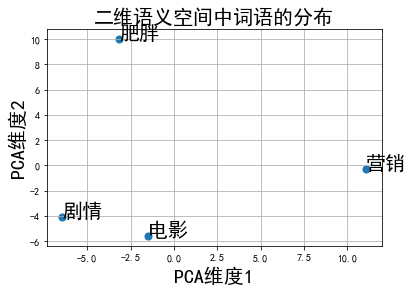

In [74]:
words = ['电影', '剧情', '营销', '肥胖']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

电影、营销和剧情三者有一定的语义相近，肥胖则相对语义较远